In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import torch
import os

batch_index = 1

dataset_path = "/content/drive/MyDrive/product_page_dataset/dataset/raw"

x = torch.load(os.path.join(dataset_path, f"{batch_index}.x"))
e = torch.load(os.path.join(dataset_path, f"{batch_index}.e"))
mask = torch.load(os.path.join(dataset_path, f"{batch_index}.mask"))
meta = pickle.load(open(os.path.join(dataset_path, f"{batch_index}.meta"), "rb"))

<ipython-input-2-d4c5365a73b1>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(os.path.join(dataset_path, f"{batch_index}.x"))
<ipython-input-2-d4c5365a73b1>

# Text Validation

In [ ]:
meta[0]

{'path': '/html/head', 'text': '', 'tag': 'head'}

In [ ]:
# prompt: compute the percent of mask values that are true

true_count = torch.sum(mask).item()
total_count = mask.numel()
percent_true = (true_count / total_count) * 100
print(f"Percent of mask values that are true: {percent_true:.2f}%")


Percent of mask values that are true: 35.34%


In [ ]:
n = 10
for i in range(len(x)):
    if mask[-i] and meta[-i]['tag'] == 'button':
        print(meta[-i]['text'])
        n -= 1
        if n <= 0:
            break

More payment options
Buy it now
Close
Add to cart
Send
View more
View more
View more
View more
View more


# Tree Structure

In [ ]:
e[:,0], e.shape

(tensor([0, 1]), torch.Size([2, 105605]))

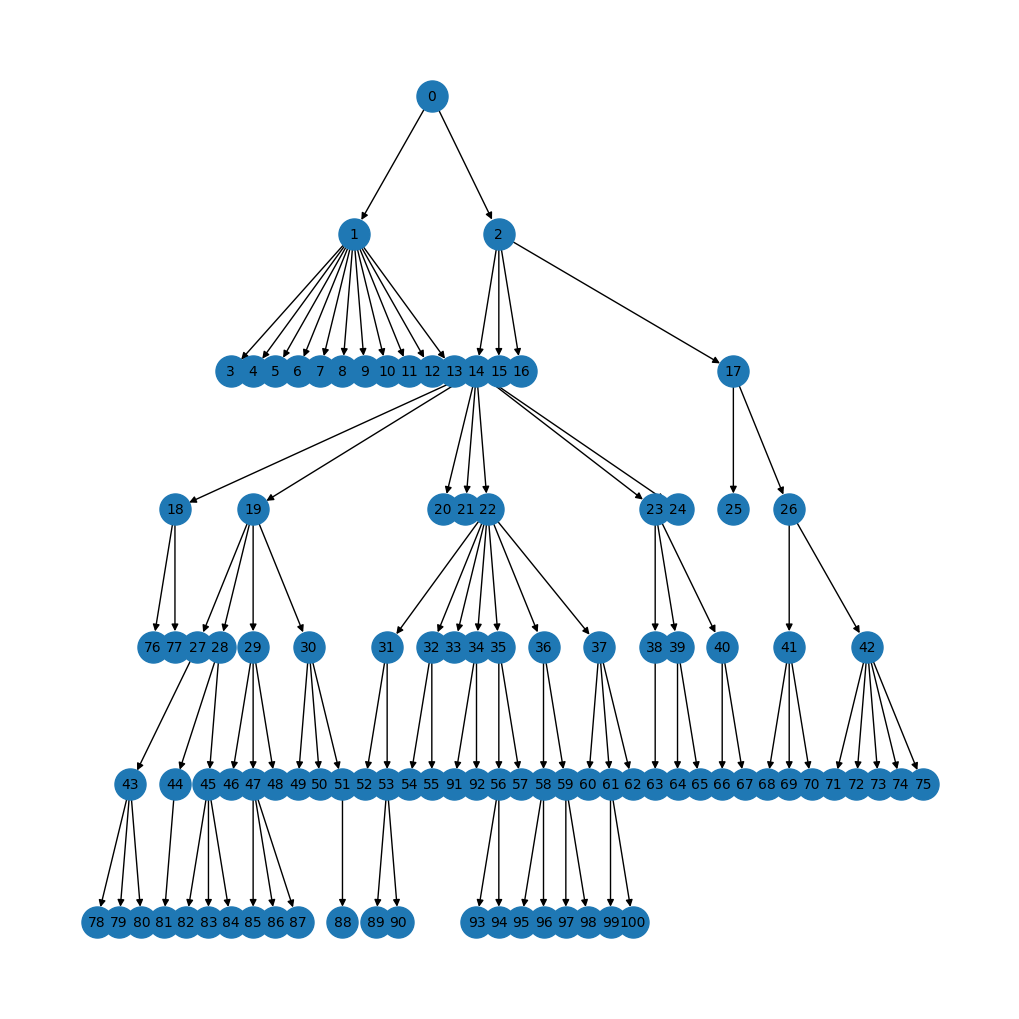

In [ ]:
# prompt: render a tree graph based on the edge index "e" for the first 100 edges

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# Create a directed graph
graph = nx.DiGraph()

# Add edges based on the edge index "e" for the first 100 edges
for i in range(100):
  source = e[0, i].item()
  target = e[1, i].item()
  graph.add_edge(source, target)

# Draw the graph
plt.figure(figsize=(10, 10))
pos = graphviz_layout(graph, prog="dot")
nx.draw(graph, pos, with_labels=True, node_size=500, font_size=10)
plt.show()


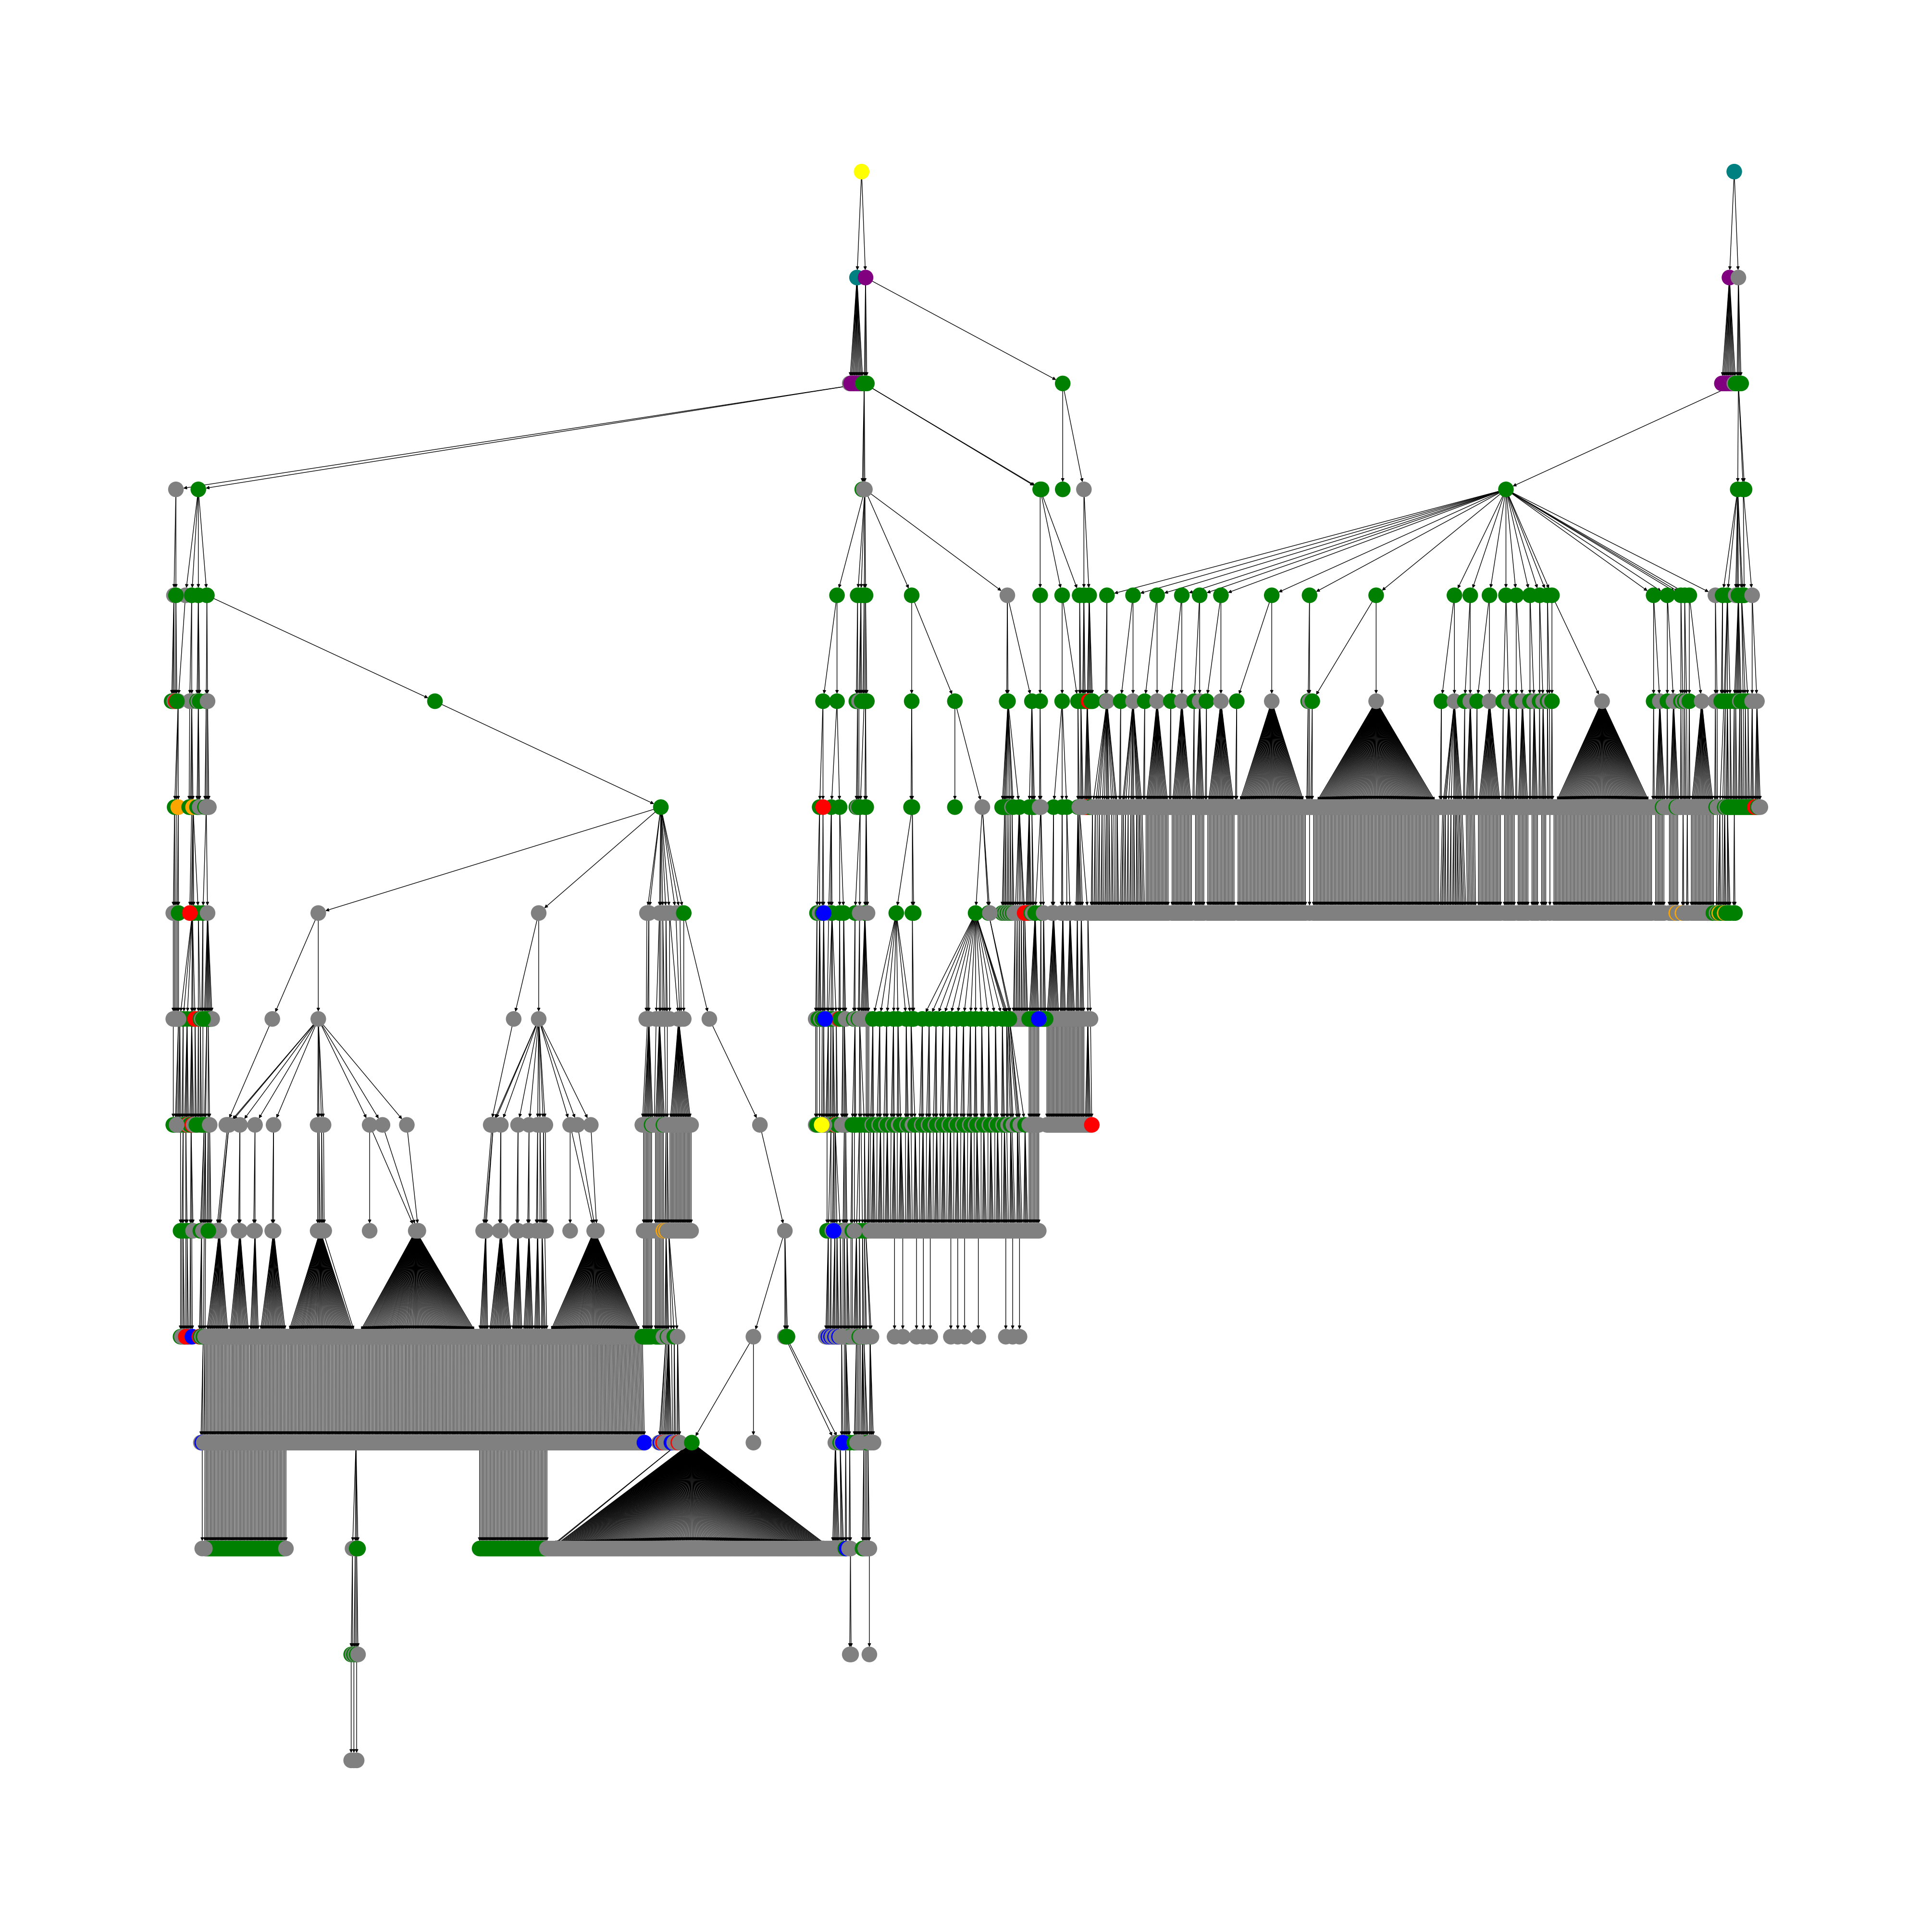

In [ ]:
# prompt: render the tree graph like above but color the nodes based on the tag value in meta[i]['tag']

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

N = 3000

# Create a directed graph
graph = nx.DiGraph()

# Add edges based on the edge index "e" for the first 100 edges
for i in range(N):
  source = e[0, i].item()
  target = e[1, i].item()
  graph.add_edge(source, target)

# Create a dictionary to map tags to colors
tag_colors = {
    'button': 'red',
    'input': 'blue',
    'div': 'green',
    'head': 'yellow',
    'body': 'teal',
    'link': 'purple',
    'h2': 'orange',
    # Add more tags and colors as needed
    'default': 'gray'  # Default color for other tags
}

# Get node colors based on tags
node_colors = [tag_colors.get(meta[i]['tag'], tag_colors['default']) for i in range(N + 2)]

# Draw the graph with colored nodes
plt.figure(figsize=(40, 40))
pos = graphviz_layout(graph, prog="dot")
nx.draw(graph, pos, with_labels=False, node_size=500, font_size=10, node_color=node_colors)
plt.show()


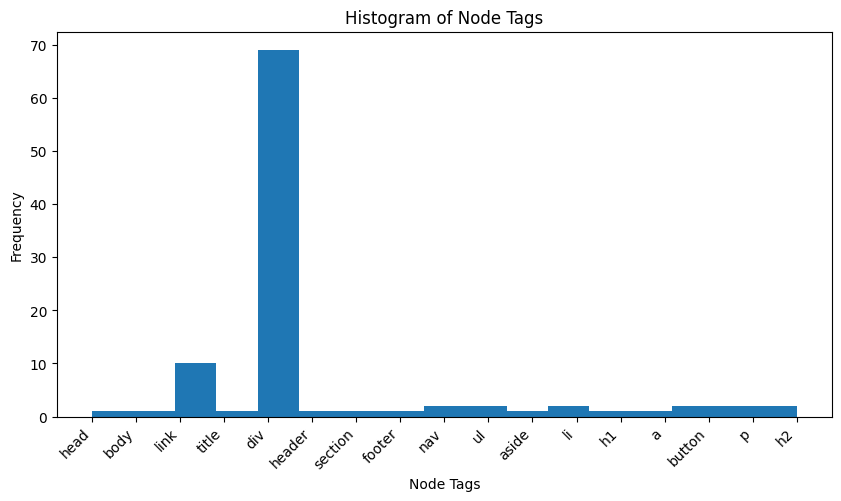

In [ ]:
# prompt: create a histogram of the first 100 values in meta[i]['tag']

import matplotlib.pyplot as plt

# Extract the tags for the first 100 nodes
tags = [meta[i]['tag'] for i in range(100)]

# Create a histogram
plt.figure(figsize=(10, 5))
plt.hist(tags, bins=len(set(tags)))
plt.xlabel("Node Tags")
plt.ylabel("Frequency")
plt.title("Histogram of Node Tags")
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
# prompt: put the first 2000 meta dictionaries into a csv file

import csv

# Define the path to the CSV file
csv_file_path = "/content/drive/MyDrive/product_page_dataset/dataset/raw/meta_data.csv"

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
  # Create a CSV writer object
  writer = csv.DictWriter(csvfile, fieldnames=meta[0].keys())

  # Write the header row
  writer.writeheader()

  # Write the first 2000 meta dictionaries to the CSV file
  for row in meta[:2000]:
    writer.writerow(row)


In [ ]:
# prompt: find the indexs of meta with the path "/html/body"

# Find the indices of meta with the path "/html/body"
indices = [i for i, item in enumerate(meta) if item['path'] == "/html/body"]
print(indices)


[1, 1978, 4095, 5946, 7827, 9801, 11566, 13355, 15198, 17000, 18925, 20801, 22650, 24397, 26326, 26494, 26643, 26800, 26962, 27122, 27958, 28795, 28799, 28814, 29639, 30460, 31323, 31327, 31331, 31335, 32171, 33044, 33840, 34648, 35548, 36482, 37388, 37508, 37628, 37748, 37868, 37988, 38676, 39364, 40052, 40733, 41414, 41562, 41710, 41858, 42006, 42154, 42993, 43779, 44660, 45555, 46441, 47344, 48239, 49120, 50015, 50896, 51780, 52675, 53854, 54824, 55708, 56603, 57528, 58427, 59307, 59562, 59800, 60098, 60354, 60643, 63001, 65467, 67854, 70049, 72412, 74899, 77109, 79571, 81941, 84297, 86669, 89058, 91417, 93623, 95832, 98042, 100230, 102418, 102763, 103108, 103446, 103784, 104129, 105009]


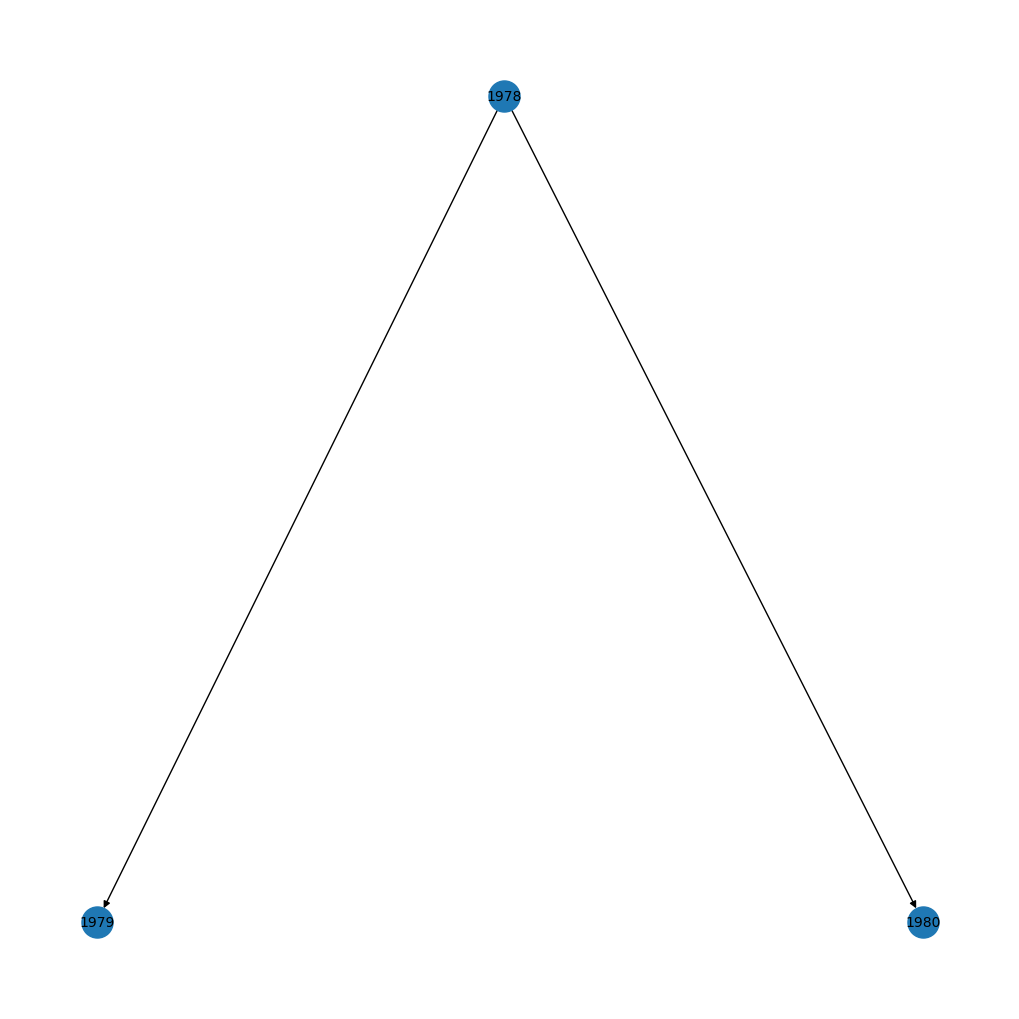

In [ ]:
# prompt: show the graph from edge index "e" that connects to the index 1978 and limit the amount of nodes shown

# Find nodes connected to index 1978
connected_nodes = []
for i in range(e.shape[1]):
  if e[0, i] == 1978 or e[1, i] == 1978:
    connected_nodes.extend([e[0, i].item(), e[1, i].item()])

# Create a subgraph with limited nodes
subgraph_nodes = list(set(connected_nodes))[:50]  # Limit to 50 nodes
subgraph = graph.subgraph(subgraph_nodes)

# Draw the subgraph
plt.figure(figsize=(10, 10))
pos = graphviz_layout(subgraph, prog="dot")
nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=10)
plt.show()


In [ ]:
# prompt: count the number of connected clusters in edge index "e"

import networkx as nx

# Create a directed graph
graph = nx.DiGraph()

# Add edges based on the edge index "e"
for i in range(e.shape[1]):
  source = e[0, i].item()
  target = e[1, i].item()
  graph.add_edge(source, target)

# Find the number of connected components
num_clusters = nx.number_weakly_connected_components(graph)

print(f"Number of connected clusters: {num_clusters}")


Number of connected clusters: 100


# Checking the signal statistics

In [ ]:
# prompt: sum the standard deviation of the first 384 dimensions of x vs the last 8 dimensions of x

import numpy as np

# Calculate the standard deviation of the first 384 dimensions
std_first_384 = torch.std(x[:, :384], axis=0).sum()

# Calculate the standard deviation of the last 8 dimensions
std_last_8 = torch.std(x[:, -8:], axis=0).sum()

print(std_first_384 , std_last_8)

print(std_first_384/384 , std_last_8/ 8)


tensor(12.7728, grad_fn=<SumBackward0>) tensor(2.4908, grad_fn=<SumBackward0>)
tensor(0.0333, grad_fn=<DivBackward0>) tensor(0.3113, grad_fn=<DivBackward0>)


In [ ]:
# prompt: compute the mean length of the first 384 dimensions of x

# Calculate the mean length of the first 384 dimensions
mean_length_first_384 = torch.mean(torch.linalg.norm(x[:, :384], dim=1))
print(f"Mean length of the first 384 dimensions: {mean_length_first_384}")


Mean length of the first 384 dimensions: 1.0


In [ ]:
# prompt: compute the mean length of the last 8 dimensions of x

# Calculate the mean length of the last 8 dimensions
mean_length_last_8 = torch.mean(torch.linalg.norm(x[:, -8:], dim=1))
print(f"Mean length of the last 8 dimensions: {mean_length_last_8}")


Mean length of the last 8 dimensions: 1.0
